# Importing all the necessary libraries

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Reading the dataset

In [21]:
df=pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [22]:
df.head(2)

VIN (1-10)   County     City State  Postal Code  Model Year   Make  \
0  5YJ3E1EB2J  Suffolk  Suffolk    VA      23435.0        2018  TESLA   
1  5YJ3E1ECXL   Yakima   Yakima    WA      98908.0        2020  TESLA   

     Model           Electric Vehicle Type  \
0  MODEL 3  Battery Electric Vehicle (BEV)   
1  MODEL 3  Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             215   
1           Clean Alternative Fuel Vehicle Eligible             308   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       476647986   
1          0                  14.0       103490145   

              Vehicle Location Electric Utility  2020 Census Tract  
0    POINT (-76.42443 36.8752)              NaN       5.180008e+10  
1  POINT (-120.56916 46.58514)       PACIFICORP       5.307700e+10

# Checking the value count of features

In [23]:
df['DOL Vehicle ID'].value_counts()

476647986    1
180668799    1
176235524    1
233625864    1
185727496    1
            ..
187436525    1
229756334    1
117655695    1
202295565    1
223872554    1
Name: DOL Vehicle ID, Length: 121978, dtype: int64

In [24]:
df['VIN (1-10)'].value_counts()

5YJYGDEE0M    465
5YJYGDEE9M    462
5YJYGDEE7M    458
5YJYGDEE8M    444
5YJYGDEEXM    436
             ... 
1G6RL1E48E      1
WP0AD2A77G      1
5YJSA1CP9C      1
WA13CBGEXN      1
1G1RG6E44C      1
Name: VIN (1-10), Length: 8171, dtype: int64

In [25]:
df['Postal Code'].value_counts()

98052.0    3192
98033.0    2217
98004.0    2117
98012.0    2073
98115.0    2008
           ... 
94901.0       1
80919.0       1
98643.0       1
30103.0       1
99356.0       1
Name: Postal Code, Length: 783, dtype: int64

In [26]:
df['Electric Utility'].value_counts()

PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                                                                 43932
PUGET SOUND ENERGY INC                                                                                        24073
CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA)                                                                  22960
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF CLARK COUNTY - (WA)                                               7056
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||PENINSULA LIGHT COMPANY                                5461
                                                                                                              ...  
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY||INLAND POWER & LIGHT COMPANY                          2
BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF ASOTIN COUNTY                                                        1
BONNEVILLE POWER ADMINISTRATION||CITY OF TACOMA - (WA)||ALDER MUTUAL LIG

In [27]:
df['2020 Census Tract'].value_counts()

5.303303e+10    663
5.303303e+10    599
5.303302e+10    432
5.303302e+10    430
5.303301e+10    427
               ... 
5.302102e+10      1
5.300195e+10      1
6.041111e+09      1
8.041004e+09      1
1.081042e+09      1
Name: 2020 Census Tract, Length: 2039, dtype: int64

In [28]:
df['Vehicle Location'].value_counts()

POINT (-122.13158 47.67858)    3192
POINT (-122.2066 47.67887)     2217
POINT (-122.1872 47.61001)     2117
POINT (-122.21061 47.83448)    2073
POINT (-122.31765 47.70013)    2008
                               ... 
POINT (-123.6386 46.33397)        1
POINT (-84.92804 34.37047)        1
POINT (-75.40705 40.15076)        1
POINT (-121.98947 48.51819)       1
POINT (-120.20117 45.74956)       1
Name: Vehicle Location, Length: 768, dtype: int64

# Length of dataset

In [29]:
len(df.columns)

17

# Shape of dataset

In [30]:
df.shape

(121978, 17)

# Data information

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121978 entries, 0 to 121977
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         121978 non-null  object 
 1   County                                             121976 non-null  object 
 2   City                                               121976 non-null  object 
 3   State                                              121978 non-null  object 
 4   Postal Code                                        121976 non-null  float64
 5   Model Year                                         121978 non-null  int64  
 6   Make                                               121978 non-null  object 
 7   Model                                              121874 non-null  object 
 8   Electric Vehicle Type                              121978 non-null  object

In [32]:
df.describe()

Postal Code    Model Year  Electric Range      Base MSRP  \
count  121976.000000  121978.00000   121978.000000  121978.000000   
mean    98159.128451    2019.30890       81.301407    1627.059798   
std      2602.756790       2.95635      100.890849   10267.478923   
min      1730.000000    1997.00000        0.000000       0.000000   
25%     98052.000000    2018.00000        0.000000       0.000000   
50%     98121.000000    2020.00000       25.000000       0.000000   
75%     98370.000000    2022.00000      200.000000       0.000000   
max     99701.000000    2023.00000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         121681.000000    1.219780e+05       1.219760e+05  
mean              29.738760    2.029409e+08       5.297007e+10  
std               14.737141    8.979138e+07       1.659161e+09  
min                1.000000    4.385000e+03       1.081042e+09  
25%               18.000000    1.523397e+08       5.303301e+10  
50%               34.000000    1.967532e+08       5.303303e+10  
75%               43.000000    2.258338e+08       5.305307e+10  
max               49.000000    4.792548e+08       5.603300e+10

# Correlation

In [33]:
df.corr()

/var/folders/8y/g1t40cdx69v4kmjcjghpfsbc0000gn/T/ipykernel_29651/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Postal Code  Model Year  Electric Range  Base MSRP  \
Postal Code              1.000000   -0.002284       -0.002052   0.002179   
Model Year              -0.002284    1.000000       -0.341625  -0.227394   
Electric Range          -0.002052   -0.341625        1.000000   0.090053   
Base MSRP                0.002179   -0.227394        0.090053   1.000000   
Legislative District    -0.427788    0.006103        0.022996   0.012296   
DOL Vehicle ID           0.003842   -0.036076        0.000544  -0.004367   
2020 Census Tract        0.498990    0.000713       -0.000120   0.001403   

                      Legislative District  DOL Vehicle ID  2020 Census Tract  
Postal Code                      -0.427788        0.003842           0.498990  
Model Year                        0.006103       -0.036076           0.000713  
Electric Range                    0.022996        0.000544          -0.000120  
Base MSRP                         0.012296       -0.004367           0.001403  
Legislative District              1.000000       -0.002407          -0.110689  
DOL Vehicle ID                   -0.002407        1.000000           0.003394  
2020 Census Tract                -0.110689        0.003394           1.000000

# Dropping useless columns

In [34]:
df=df.drop(['VIN (1-10)', 'Postal Code', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract'], axis=1)

# Checking NULL values

In [35]:
df.isnull().sum()

County                                                 2
City                                                   2
State                                                  0
Model Year                                             0
Make                                                   0
Model                                                104
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
dtype: int64

# Dropping NULL values

In [36]:
df=df.dropna()

# Final dataset

In [37]:
df.head(5)

County      City State  Model Year   Make    Model  \
0   Suffolk   Suffolk    VA        2018  TESLA  MODEL 3   
1    Yakima    Yakima    WA        2020  TESLA  MODEL 3   
2    Yakima    Yakima    WA        2021   AUDI   E-TRON   
3  Danville  Danville    VA        2019  TESLA  MODEL 3   
4   Norfolk   Norfolk    VA        2014   FORD    C-MAX   

                    Electric Vehicle Type  \
0          Battery Electric Vehicle (BEV)   
1          Battery Electric Vehicle (BEV)   
2          Battery Electric Vehicle (BEV)   
3          Battery Electric Vehicle (BEV)   
4  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  Base MSRP  
0           Clean Alternative Fuel Vehicle Eligible             215          0  
1           Clean Alternative Fuel Vehicle Eligible             308          0  
2           Clean Alternative Fuel Vehicle Eligible             222          0  
3           Clean Alternative Fuel Vehicle Eligible             220          0  
4             Not eligible due to low battery range              19          0

# Data Visulization

# Top Selling Cars

Text(0, 0.5, 'Count')

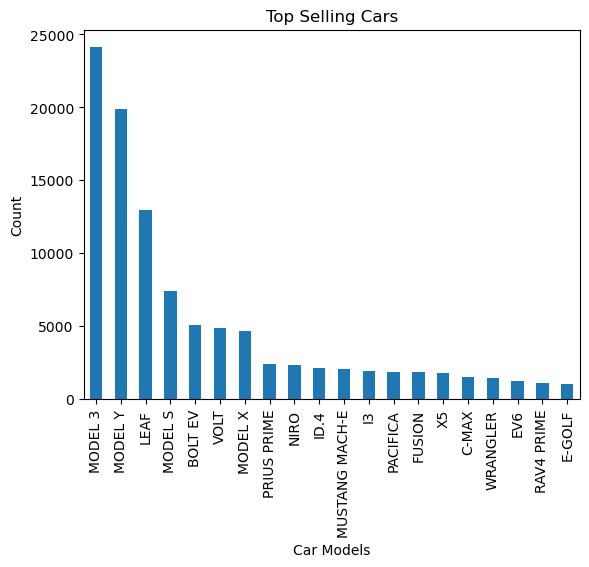

In [38]:
df['Model'].value_counts()[:20].plot(kind='bar')
plt.title('Top Selling Cars')
plt.xlabel("Car Models")
plt.ylabel("Count")

# Data Distribuation

Text(0, 0.5, 'Count')

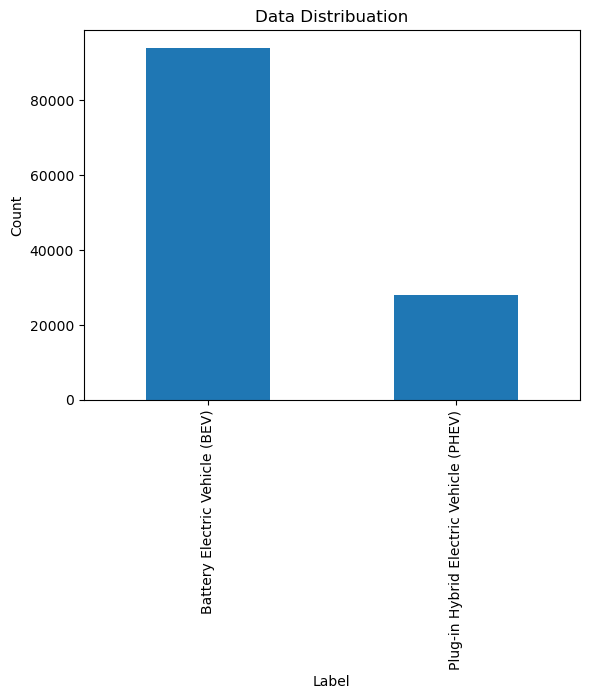

In [39]:
df['Electric Vehicle Type'].value_counts().plot(kind='bar')
plt.title('Data Distribuation')
plt.xlabel("Label")
plt.ylabel("Count")

# Exporting data to csv

In [40]:
df.to_csv("Preprocess.csv")